In [1]:
# Visualizing Maxar Open Data using leafmap
# case:India Floods, October, 2023 

import geopandas as gpd
import pandas as pd
import leafmap.foliumap as leafmap

In [2]:
# Retrieving all collections from the Maxar Open Data STAC catalog
leafmap.maxar_collections()

['BayofBengal-Cyclone-Mocha-May-23',
 'Emilia-Romagna-Italy-flooding-may23',
 'Gambia-flooding-8-11-2022',
 'Hurricane-Fiona-9-19-2022',
 'Hurricane-Ian-9-26-2022',
 'Hurricane-Idalia-Florida-Aug23',
 'India-Floods-Oct-2023',
 'Indonesia-Earthquake22',
 'Kahramanmaras-turkey-earthquake-23',
 'Kalehe-DRC-Flooding-5-8-23',
 'Libya-Floods-Sept-2023',
 'Marshall-Fire-21-Update',
 'Maui-Hawaii-fires-Aug-23',
 'McDougallCreekWildfire-BC-Canada-Aug-23',
 'Morocco-Earthquake-Sept-2023',
 'NWT-Canada-Aug-23',
 'New-Zealand-Flooding22',
 'New-Zealand-Flooding23',
 'Sudan-flooding-8-22-2022',
 'afghanistan-earthquake22',
 'cyclone-emnati22',
 'ghana-explosion22',
 'kentucky-flooding-7-29-2022',
 'pakistan-flooding22',
 'shovi-georgia-landslide-8Aug23',
 'southafrica-flooding22',
 'tonga-volcano21',
 'volcano-indonesia21',
 'yellowstone-flooding22']

In [3]:
# Selecting India Floods collection id ("India-Floods-Oct-2023")
# Getting the footprints (geojson, tsv) of the event from the Maxar Open Data GitHub repo
# https://github.com/opengeos/maxar-open-data

collection = 'India-Floods-Oct-2023'
url = leafmap.maxar_collection_url(collection, dtype='geojson')
url

'https://raw.githubusercontent.com/giswqs/maxar-open-data/master/datasets/India-Floods-Oct-2023.geojson'

In [4]:
# Checking the amount of images for the event
gdf = gpd.read_file(url)
print(f'Total number of images: {len(gdf)}')
gdf.head()

Total number of images: 51


,datetime,platform,gsd,ard_metadata_version,catalog_id,utm_zone,quadkey,view:off_nadir,view:azimuth,view:incidence_angle,view:sun_azimuth,view:sun_elevation,proj:epsg,grid:code,proj:bbox,tile:data_area,tile:clouds_area,tile:clouds_percent,visual,geometry
0,2022-03-07 04:53:47+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031201,26.0,16.6,60.5,145.2,51.2,32645,MXRA-Z45-120220031201,"625296.8635054945,3094843.75,630156.25,3096239...",6.6,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32336 27.97234, 88.27411 27.97281..."
1,2022-03-07 04:53:47+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031210,26.0,16.0,60.6,145.2,51.2,32645,MXRA-Z45-120220031210,"629843.75,3094843.75,633024.0847732465,3096270...",4.4,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32019 27.97237, 88.32034 27.98493..."
2,2022-03-07 04:53:48+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031203,26.2,16.4,60.4,145.2,51.2,32645,MXRA-Z45-120220031203,"625307.5956898255,3089843.75,630156.25,3095156.25",25.6,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32340 27.97516, 88.32281 27.92722..."
3,2022-03-07 04:53:48+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031212,26.1,15.9,60.5,145.2,51.2,32645,MXRA-Z45-120220031212,"629843.75,3089843.75,633050.5890839597,3095156.25",16.9,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.31964 27.92725, 88.32022 27.97519..."
4,2022-03-07 04:53:48+00:00,WV02,0.57,0.0.1,10300100CE36CE00,45,120220031221,26.3,16.2,60.3,145.2,51.2,32645,MXRA-Z45-120220031221,"625359.7006774588,3086232.4385818127,630156.25...",18.6,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32285 27.93004, 88.32242 27.89509..."


In [5]:
# Selecting the images captured before the event (4th October 2023)
pre_gdf = leafmap.maxar_search(collection, end_date='2023-10-04')
print(f'Total number of pre-event images: {len(pre_gdf)}')
pre_gdf.head()

Total number of pre-event images: 42


,datetime,platform,gsd,ard_metadata_version,catalog_id,utm_zone,quadkey,view:off_nadir,view:azimuth,view:incidence_angle,view:sun_azimuth,view:sun_elevation,proj:epsg,grid:code,proj:bbox,tile:data_area,tile:clouds_area,tile:clouds_percent,visual,geometry
0,2022-03-07 04:53:47+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031201,26.0,16.6,60.5,145.2,51.2,32645,MXRA-Z45-120220031201,"625296.8635054945,3094843.75,630156.25,3096239...",6.6,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32336 27.97234, 88.27411 27.97281..."
1,2022-03-07 04:53:47+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031210,26.0,16.0,60.6,145.2,51.2,32645,MXRA-Z45-120220031210,"629843.75,3094843.75,633024.0847732465,3096270...",4.4,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32019 27.97237, 88.32034 27.98493..."
2,2022-03-07 04:53:48+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031203,26.2,16.4,60.4,145.2,51.2,32645,MXRA-Z45-120220031203,"625307.5956898255,3089843.75,630156.25,3095156.25",25.6,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32340 27.97516, 88.32281 27.92722..."
3,2022-03-07 04:53:48+00:00,WV02,0.56,0.0.1,10300100CE36CE00,45,120220031212,26.1,15.9,60.5,145.2,51.2,32645,MXRA-Z45-120220031212,"629843.75,3089843.75,633050.5890839597,3095156.25",16.9,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.31964 27.92725, 88.32022 27.97519..."
4,2022-03-07 04:53:48+00:00,WV02,0.57,0.0.1,10300100CE36CE00,45,120220031221,26.3,16.2,60.3,145.2,51.2,32645,MXRA-Z45-120220031221,"625359.7006774588,3086232.4385818127,630156.25...",18.6,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.32285 27.93004, 88.32242 27.89509..."


In [6]:
# Selectin images captured after the event
post_gdf = leafmap.maxar_search(collection, start_date='2023-10-04')
print(f'Total number of post-event images: {len(post_gdf)}')
post_gdf.head()

Total number of post-event images: 9


,datetime,platform,gsd,ard_metadata_version,catalog_id,utm_zone,quadkey,view:off_nadir,view:azimuth,view:incidence_angle,view:sun_azimuth,view:sun_elevation,proj:epsg,grid:code,proj:bbox,tile:data_area,tile:clouds_area,tile:clouds_percent,visual,geometry
42,2023-10-06 05:04:39+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030313,26.1,261.6,60.9,157.6,55.0,32645,MXRA-Z45-120220030313,"614843.75,3089843.75,617668.6296208797,3091672...",5.1,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.16722 27.92862, 88.16739 27.94489..."
43,2023-10-06 05:04:39+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030331,26.0,262.5,61.0,157.6,55.0,32645,MXRA-Z45-120220030331,"614843.75,3084843.75,617717.4718004398,3090156.25",15.1,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.16673 27.88350, 88.16725 27.93145..."
44,2023-10-06 05:04:39+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030333,26.0,263.3,61.0,157.6,55.0,32645,MXRA-Z45-120220030333,"614843.75,3081698.7778129643,617747.929473526,...",9.9,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.16676 27.88632, 88.19592 27.88606..."
45,2023-10-06 05:04:40+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030312,25.9,260.4,61.1,157.6,55.0,32645,MXRA-Z45-120220030312,"609843.75,3089843.75,615156.25,3091649.212635094",9.4,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.17039 27.92860, 88.11641 27.92905..."
46,2023-10-06 05:04:40+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030323,25.7,261.5,61.3,157.6,55.0,32645,MXRA-Z45-120220030323,"608496.9881654698,3081640.641251588,610156.25,...",5.4,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.11915 27.88671, 88.11882 27.85511..."


In [7]:
# Visualizing the pre-event and post-event image footprints on the map to select are of interest to present on the split map
# Pre-events: blue colour, post-events: red colour

m = leafmap.Map(center=(27.4978, 88.5347), zoom=8)
post_style = {'color': 'red', 'fillColor': 'red', 'opacity': 1, 'fillOpacity': 0.5}
m.add_gdf(pre_gdf, layer_name='Pre-event', info_mode='on_click')
m.add_gdf(post_gdf, layer_name='Post-event', info_mode='on_click', style=post_style)
m

# Github is not displaying interactive maps created by folium, in order to display interactive map, please go to:
# https://nbviewer.org/github/mkupisie/Creating-split-map-with-open-maxar-data-using-leafmap/blob/3000dca81d134b336136bbb527cbb889cd28c84d/leafmap_maxar_data_split_m.ipynb

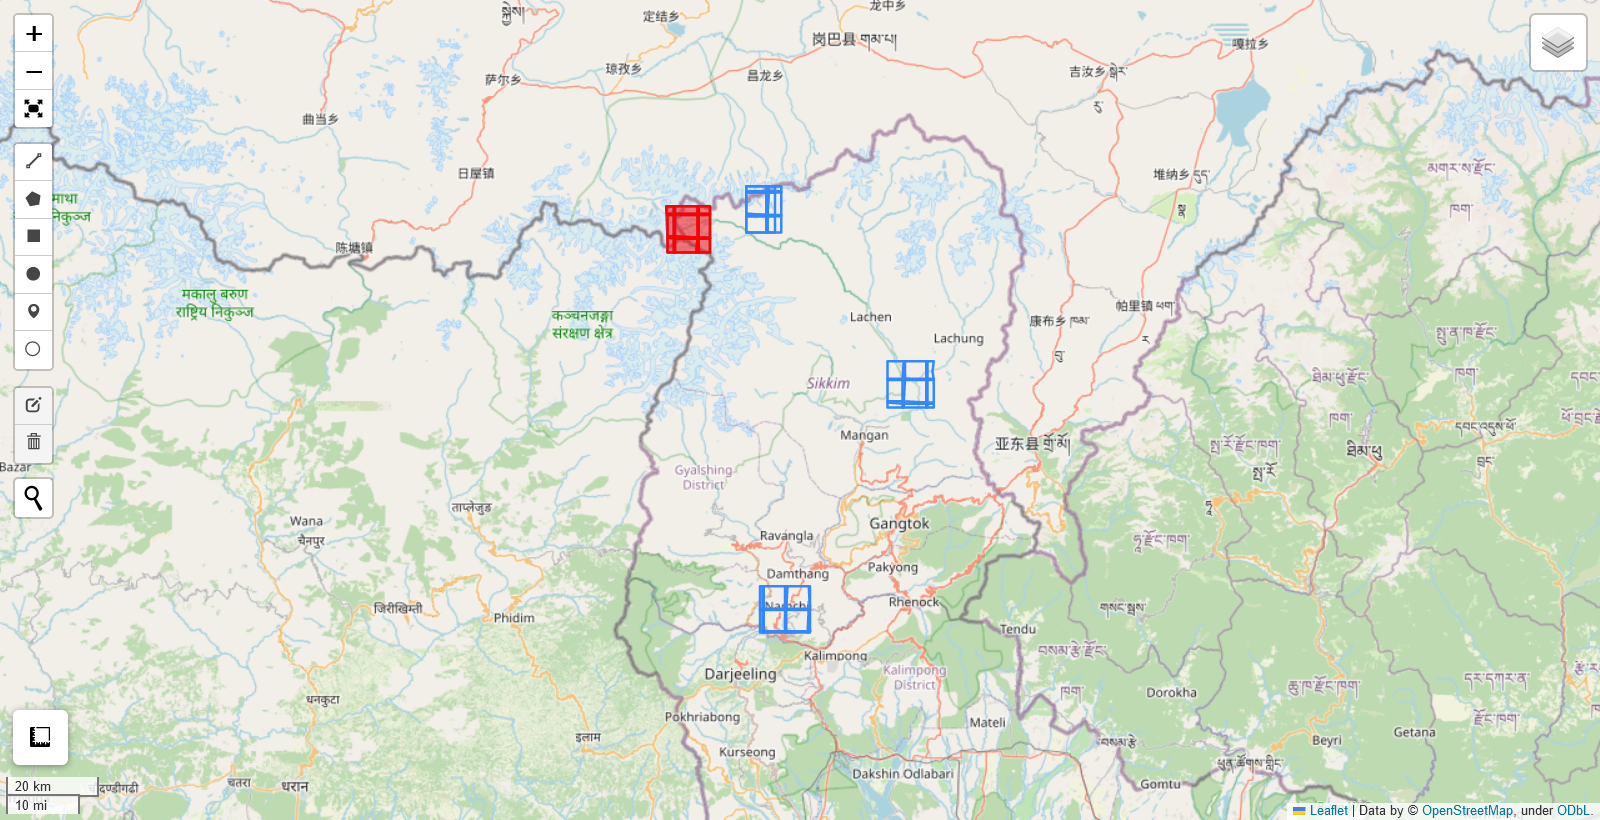

In [17]:
# Below map is going to be saved as a static map to be visible on github

import os
import time
from selenium import webdriver

# Saving map as html
# m.save('m.html')

# Using selenium to convert html to png
delay=5
fn='m.html'
tmpurl='file:///C:/Users/Public/m.html'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)

# Giving the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('m.png')
browser.quit()

# Displaying saved png map using IPython
from IPython import display
display.Image("C:/Users/Public/m.png")

In [14]:
# Using the draw tools to select a region of interest (ROI) and get the bounding box coordinates
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [88.0997,27.8516 ,88.2019, 27.9471]

The folium plotting backend does not support this function.


In [9]:
# Searching the Maxar Open Data catalog for images within the ROI before the event
pre_event = leafmap.maxar_search(collection, bbox=bbox, end_date='2023-10-04')
pre_event.head()

,datetime,platform,gsd,ard_metadata_version,catalog_id,utm_zone,quadkey,view:off_nadir,view:azimuth,view:incidence_angle,view:sun_azimuth,view:sun_elevation,proj:epsg,grid:code,proj:bbox,tile:data_area,tile:clouds_area,tile:clouds_percent,visual,geometry
33,2023-02-07 04:40:45+00:00,WV02,0.58,0.0.1,10300100E34B4D00,45,120220030303,28.1,92.2,58.1,147.4,40.5,32645,MXRA-Z45-120220030303,"608245.9743433739,3089843.75,610156.25,3091602...",3.1,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.11958 27.92902, 88.10017 27.92918..."
34,2023-02-07 04:40:45+00:00,WV02,0.58,0.0.1,10300100E34B4D00,45,120220030312,28.0,92.2,58.3,147.4,40.5,32645,MXRA-Z45-120220030312,"609843.75,3089843.75,615156.25,3091649.212635094",9.4,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.17039 27.92860, 88.11641 27.92905..."
35,2023-02-07 04:40:45+00:00,WV02,0.58,0.0.1,10300100E34B4D00,45,120220030313,27.7,92.2,58.6,147.4,40.5,32645,MXRA-Z45-120220030313,"614843.75,3089843.75,617668.6296208797,3091672...",5.1,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.16722 27.92862, 88.16739 27.94489..."
36,2023-02-07 04:40:46+00:00,WV02,0.58,0.0.1,10300100E34B4D00,45,120220030321,28.1,91.9,58.2,147.4,40.5,32645,MXRA-Z45-120220030321,"608230.4609330465,3084843.75,610156.25,3090156.25",9.6,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.11961 27.93184, 88.11912 27.88389..."
37,2023-02-07 04:40:46+00:00,WV02,0.58,0.0.1,10300100E34B4D00,45,120220030323,28.0,91.7,58.2,147.4,40.5,32645,MXRA-Z45-120220030323,"608501.8920898438,3081640.641251588,610156.25,...",5.2,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.11915 27.88671, 88.11882 27.85511..."


In [10]:
# Searching the Maxar Open Data catalog for images within the ROI after the event
post_event = leafmap.maxar_search(collection, bbox=bbox, start_date='2023-10-04')
post_event.head()

,datetime,platform,gsd,ard_metadata_version,catalog_id,utm_zone,quadkey,view:off_nadir,view:azimuth,view:incidence_angle,view:sun_azimuth,view:sun_elevation,proj:epsg,grid:code,proj:bbox,tile:data_area,tile:clouds_area,tile:clouds_percent,visual,geometry
42,2023-10-06 05:04:39+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030313,26.1,261.6,60.9,157.6,55.0,32645,MXRA-Z45-120220030313,"614843.75,3089843.75,617668.6296208797,3091672...",5.1,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.16722 27.92862, 88.16739 27.94489..."
43,2023-10-06 05:04:39+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030331,26.0,262.5,61.0,157.6,55.0,32645,MXRA-Z45-120220030331,"614843.75,3084843.75,617717.4718004398,3090156.25",15.1,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.16673 27.88350, 88.16725 27.93145..."
44,2023-10-06 05:04:39+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030333,26.0,263.3,61.0,157.6,55.0,32645,MXRA-Z45-120220030333,"614843.75,3081698.7778129643,617747.929473526,...",9.9,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.16676 27.88632, 88.19592 27.88606..."
45,2023-10-06 05:04:40+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030312,25.9,260.4,61.1,157.6,55.0,32645,MXRA-Z45-120220030312,"609843.75,3089843.75,615156.25,3091649.212635094",9.4,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.17039 27.92860, 88.11641 27.92905..."
46,2023-10-06 05:04:40+00:00,GE01,0.49,0.0.1,1050010036A0EC00,45,120220030323,25.7,261.5,61.3,157.6,55.0,32645,MXRA-Z45-120220030323,"608496.9881654698,3081640.641251588,610156.25,...",5.4,0.0,0,https://maxar-opendata.s3.amazonaws.com/events...,"POLYGON ((88.11915 27.88671, 88.11882 27.85511..."


In [11]:
# Getting the catalog id of the pre-event tile and post-event tile, which contain several images
pre_tile = pre_event['catalog_id'].values[0]
post_tile = post_event['catalog_id'].values[0]

print(f"pre_tile: {pre_tile}\npost_tile: {post_tile}")

pre_tile: 10300100E34B4D00
post_tile: 1050010036A0EC00


In [12]:
# Getting the MosaicJSON for the pre-event and post-event tile
pre_stac = leafmap.maxar_tile_url(collection, pre_tile, dtype='json')
post_stac = leafmap.maxar_tile_url(collection, post_tile, dtype='json')
print(f"{pre_stac}\n{post_stac}")

https://raw.githubusercontent.com/giswqs/maxar-open-data/master/datasets/India-Floods-Oct-2023/10300100E34B4D00.json
https://raw.githubusercontent.com/giswqs/maxar-open-data/master/datasets/India-Floods-Oct-2023/1050010036A0EC00.json


In [13]:
# Creating a split map to compare the pre-event and post-event images

event_map = leafmap.Map(draw_control=False)
event_map.split_map(
    left_layer=pre_stac,
    right_layer=post_stac,
    left_label='Pre-event',
    right_label='Post-event',
    center=[27.4978, 88.5347],
    zoom=10,
)
event_map

# Github is not displaying interactive maps created by folium, in order to display interactive map, please go to:
# https://nbviewer.org/github/mkupisie/Creating-split-map-with-open-maxar-data-using-leafmap/blob/3000dca81d134b336136bbb527cbb889cd28c84d/leafmap_maxar_data_split_m.ipynb

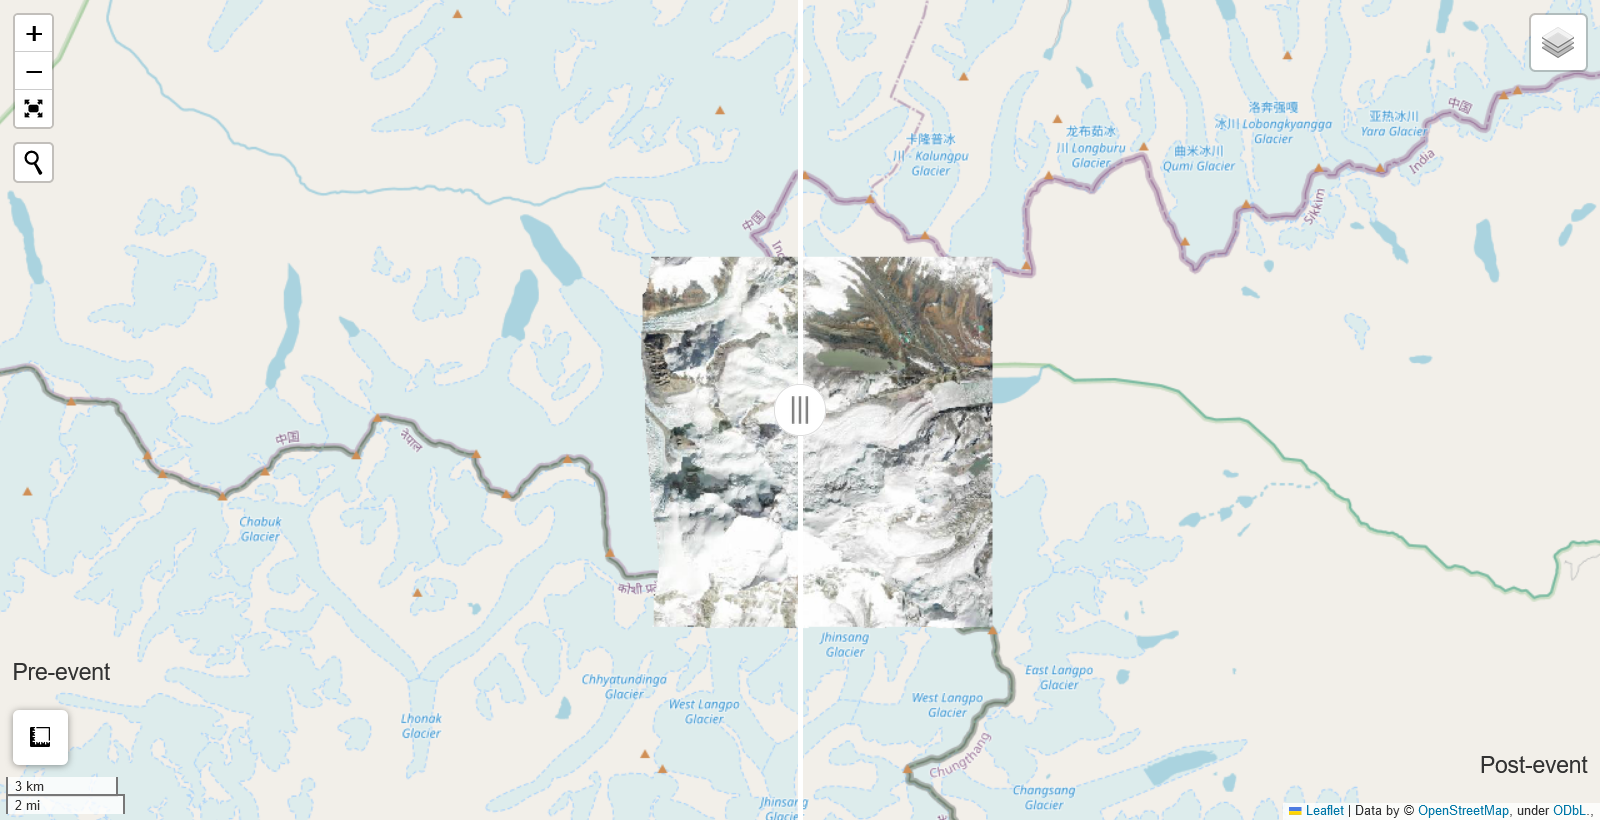

In [22]:
# Below split map is going to be saved as a static map to be visible on github

# Saving map as html
# event_map.save('m.html')

# Using selenium to convert html to png
delay=5
fn='event_map.html'
tmpurl='file:///C:/Users/Public/event_map.html'.format(path=os.getcwd(),mapfile=fn)
event_map.save(fn)

browser = webdriver.Firefox()
browser.get(tmpurl)

# Giving the map tiles some time to load
time.sleep(delay)
browser.save_screenshot('event_map.png')
browser.quit()

# Displaying saved png map using IPython
from IPython import display
display.Image("C:/Users/Public/event_map.png")